# Zomato Project 

In [7]:
#  These lines import essential Python libraries for the project:
# - pandas (pd): used for handling and analyzing structured data (DataFrames, CSV files, etc.)
# - numpy (np): used for numerical operations and handling arrays
# - matplotlib.pyplot (plt): used for creating visualizations and plots
# - seaborn (sns): built on top of matplotlib, used for advanced and visually appealing statistical plots 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#  Imports the sqlite3 library, which allows Python to connect to and interact with SQLite databases.
#  It's often used to read data stored in .sqlite or .db files for analysis in data science projects.
import sqlite3

In [9]:
# Creates a connection to the SQLite database file located at Data/zomato_rawdata.sqlite.
# * why adding the 'r' before path to file?
#  it tells Python not to treat backslashes (\) as special escape characters — just to take the string exactly as written.
connection = sqlite3.connect(r'Data/zomato_rawdata.sqlite')

In [10]:
# Runs an SQL query that selects all rows and columns from the table USERS,
# and loads the result into a pandas DataFrame called df for further analysis in Python.
df = pd.read_sql_query("SELECT * FROM USERS" , connection)

In [11]:
# Displays the first five rows of the DataFrame df.
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [12]:
# Returns a tuple showing the number of rows and columns in the DataFrame df.
# It helps understand the dataset’s size — for example, (1000, 12) means 1000 rows and 12 columns.
df.shape

(51717, 18)

In [13]:
# Removes the column named 'index' from the DataFrame df.
df = df.drop(columns=['index'])

In [14]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
# Checks for missing values in each column of the DataFrame df and sums them up.
# The output shows how many null (NaN) values exist per column, helping identify where data cleaning is needed.
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
# Displays the data type of each column in the DataFrame df.
# This helps understand whether columns are stored as numbers, text, dates, or other types — important for preprocessing and analysis steps.
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [17]:
# Returns an array of all unique values found in the column 'approx_cost(for two people)'.
# This is useful to explore possible formats, duplicates, or inconsistencies in that column before cleaning or transforming it.
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
# Removes all commas from the string values in the column 'approx_cost(for two people)'.
# This prepares the data so the values can be safely converted from text strings into numeric format later.
df['approx_cost(for two people)']= df['approx_cost(for two people)'].str.replace(',','')


In [19]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [20]:
# Converts the cleaned string values in 'approx_cost(for two people)' into floating-point numbers.
# This allows numerical operations such as calculations, statistical analysis, and visualizations on that column.

df['approx_cost(for two people)']= df['approx_cost(for two people)'].astype(float)

In [21]:
# now we'll see what's the matter with the 'rate' feature, which suppose to be int\float as well, however appear as an object 
df['approx_cost(for two people)'].dtype

dtype('float64')

In [22]:
# Displays the 'rate' column from the DataFrame df
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713      None
51714      None
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [23]:
# Removes the '/5' part from each value in the 'rate' column
# This cleans the data so only the numeric portion of the rating remains, making it easier to convert into a numeric type later
df['rate'] = df['rate'].str.replace('/5','')

In [24]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
# Converts all values in the 'rate' column to strings
# This ensures consistent data type before applying string operations like replace() or handling missing values
df['rate'] = df['rate'].astype(str)

In [26]:
# Replaces the values 'NEW', 'None', and '-' in the 'rate' column with NaN (missing values)
# This standardizes invalid or non-numeric entries so they can be properly handled during data cleaning or analysis
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)

/tmp/ipykernel_2341219/2192293719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace('NEW', np.nan, inplace=True)
/tmp/ipykernel_2341219/2192293719.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [27]:
# Converts the cleaned 'rate' column from string type to float
# This allows performing numerical calculations or visualizations using the restaurant ratings
df['rate'] = df['rate'].astype(float)

In [28]:
# Counts how many times each restaurant type appears in the 'rest_type' column
# This helps identify the most common or popular types of restaurants based on the dataset
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [29]:
# Counts how many missing (NaN) values exist in the 'rest_type' column
# Useful for checking data completeness before further analysis or visualization
df['rest_type'].isnull().sum()

np.int64(227)

In [30]:
# Creates a new DataFrame called 'data' by removing all rows where 'rest_type' has missing values
# This ensures that only rows with valid restaurant type information are kept for analysis
data = df.dropna(subset=['rest_type'])

In [31]:
data.shape

(51490, 17)

In [32]:
# Creates a new DataFrame called 'data_qb' containing only the rows where 'rest_type' includes the phrase 'Quick Bites'
# This filters the data to focus on restaurants classified as Quick Bites for deeper analysis
data_qb = data[data['rest_type'].str.contains('Quick Bites')]

In [33]:
data_qb.shape

(20639, 17)

In [34]:
# Combines all the text from the 'dish_liked' column of Quick Bites restaurants into one long lowercase string
# This makes it easier to analyze overall dish popularity by processing all mentioned dishes together
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

In [35]:
# Installs the 'wordcloud' library in the current environment
# This library is used to create word cloud visualizations that highlight the most frequent words (like popular dishes) in a dataset
!pip install wordcloud

In [36]:
# Imports the 'wordcloud' library so it can be used to generate visual word clouds from text data
import wordcloud
# Imports the WordCloud class from the wordcloud library
# This class is used to create and customize word cloud images based on text frequency
from wordcloud import WordCloud

In [37]:
# Creates a word cloud object and generates the cloud from the combined text in 'all_dishes'
# Words that appear more frequently in the text will appear larger in the resulting visualization
wordcloud= WordCloud().generate(all_dishes)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

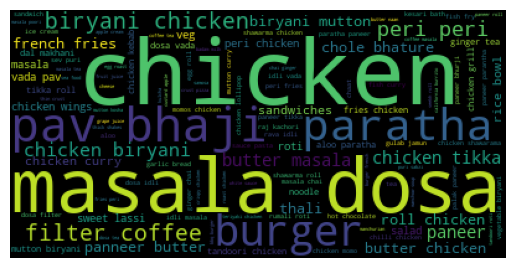

In [38]:
# Displays the generated word cloud image using matplotlib.  plt.imshow() renders the word cloud
plt.imshow(wordcloud)
# plt.axis('off') hides the axis for a cleaner visual appearance
plt.axis('off')

In [39]:
# Imports 're' for regular expressions and 'Counter' from collections to count word frequencies
import re
from collections import Counter

# Step 1: Convert all the text to lowercase (so 'Momos' and 'momos' are counted together)
text = all_dishes.lower()

# Step 2: Split the text into individual words
# The pattern r'[, ]+' means: split wherever there is a comma or space (or both)
words = re.split(r'[, ]+', text)

# Step 3: Remove any empty strings or very short words (like '')
cleaned_words = []
for word in words:
    if len(word) > 2:  # ignore words shorter than 3 letters
        cleaned_words.append(word)

# Step 4: Count how many times each dish appears
freq = Counter(cleaned_words)

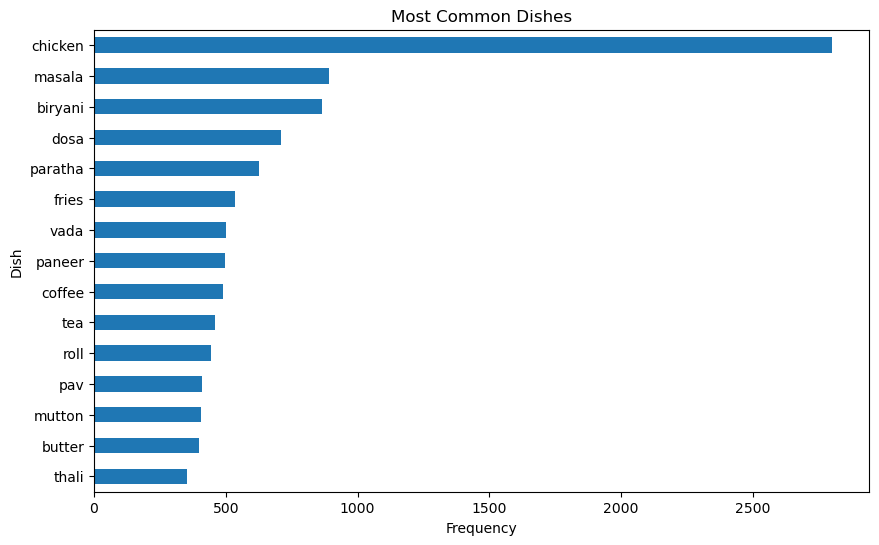

In [40]:
# Converts the frequency dictionary into a pandas Series and sorts it in descending order
# Plots the top 15 most common dishes as a horizontal bar chart
# Sets the title and axis labels, and inverts the y-axis so the most frequent dishes appear at the top
# Finally, displays the chart with plt.show()

pd.Series(freq).sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,6))
plt.title("Most Common Dishes")
plt.xlabel("Frequency")
plt.ylabel("Dish")
plt.gca().invert_yaxis()
plt.show()

## Handling missing values

In [41]:
# Checks how many missing (NaN) values exist in each column of the DataFrame df
# This helps identify which columns need data cleaning or imputation before analysis
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [42]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [43]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [44]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [45]:
df[df['rate'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [46]:
df[df['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [47]:
df['rate'][72]

np.float64(nan)

In [48]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

were gonna fill the missing 'rate' values with the reviews rating described

In [49]:
type(df['reviews_list'][72])

str

In [50]:
# Imports Python’s built-in 'ast' (Abstract Syntax Trees) module
# Commonly used to safely parse strings that look like Python literals (e.g., lists/dicts) into real Python objects without executing code
import ast

In [51]:
# Safely evaluates the string in df['reviews_list'][72] and converts it into a real Python object (like a list or tuple)
# Useful when a column contains data stored as string representations of lists or dictionaries
ast.literal_eval(df['reviews_list'][72])

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

##### What did we actually do here?

take the string stored in row 72 of the reviews_list column,

and safely convert it from a string that looks like a list into an actual Python list object.

In [52]:
# Extracts the first element from the list returned by ast.literal_eval(df['reviews_list'][72])
# This gives access to the first review entry of the restaurant at index 72
first_input = ast.literal_eval(df['reviews_list'][72])[0]
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [53]:
# Creates a new list by removing the word 'Rated' from each string in first_input
# This cleans the review text to make it easier to analyze or extract the actual rating values
[i.replace('Rated' , '') for i in first_input]

[' 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [54]:
# Similar to the previous line but also applies .strip() to remove extra spaces before or after the text
# The result is a cleaner list of reviews with 'Rated' removed and whitespace trimmed
[i.replace('Rated' , '').strip() for i in first_input]

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [55]:
# Takes the first cleaned review string from the list after removing 'Rated' and extra spaces
# Useful for quickly checking the result of the cleaning process on a single review entry
[i.replace('Rated' , '').strip() for i in first_input][0]

'4.0'

In [56]:
# Converts the first cleaned review string (e.g., '4.0') into a floating-point number
# This allows numerical operations or statistical analysis on the extracted rating value
float([i.replace('Rated' , '').strip() for i in first_input][0])

4.0

In [57]:
# Defines a function get_Rate that extracts the numeric rating from a restaurant's reviews list
# 1. Converts the string x into a Python list using ast.literal_eval
# 2. Checks if the list is empty or too short — if so, returns None
# 3. Otherwise, takes the first review, cleans the text by removing 'Rated' and extra spaces
# 4. Converts the cleaned rating to a float and returns it
def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)

    if list_of_reviews is None or len(list_of_reviews)<=1:
        return None 
    else:
        first_input = list_of_reviews[0]
        rate = float([i.replace('Rated' , '').strip() for i in first_input][0])
        return rate

In [58]:
# Applies the get_Rate function to each value in the 'reviews_list' column
# This extracts a numeric rating from each restaurant’s reviews, returning a Series of float values or None where unavailable
df['reviews_list'].apply(get_Rate)

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list, Length: 51717, dtype: float64

In [59]:
df['reviews_list']

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [60]:
# Creates a new column 'rate_from_reviews_list' that stores the extracted numeric ratings from each restaurant's reviews
# This allows easy comparison between the official 'rate' column and ratings derived from actual user reviews
df['rate_from_reviews_list'] = df['reviews_list'].apply(get_Rate)

In [61]:
# Converts the value in row 72 of the 'rate_from_reviews_list' column into a floating-point number
# Useful for verifying that the extracted rating at that specific index is numeric and valid
float(df['rate_from_reviews_list'][72])

4.0

In [62]:
# Retrieves the scalar (plain Python float) value from the element at index 72 in the 'rate' column
# .item() converts a single NumPy or pandas value into a standard Python number type
df['rate'][72].item()

nan

In [63]:
# Replaces the value in the 'rate' column at row 72 with the numeric rating from 'rate_from_reviews_list'
# This updates a missing or incorrect rating using the extracted value from the reviews list
df['rate'][72] = float(df['rate_from_reviews_list'][72])

/tmp/ipykernel_2341219/1563681137.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['rate'][72] = float(df['rate_from_reviews_list'][72])
/tmp/ipykernel_2341219/1563681137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [64]:
# Imports the warnings module and disables warning messages in the output
# This keeps the notebook cleaner by hiding non-critical warnings that don’t affect code execution
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
df['rate'][72].item()

4.0

In [66]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [67]:
df[df['rate'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_from_reviews_list
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,NaN
84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,NaN
90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,1.0
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari,NaN
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,None,South Indian,200.0,[],[],Delivery,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield,NaN
51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,NaN
51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,NaN
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield,NaN


In [68]:
# Creates a variable nan_index containing the index positions of all rows where the 'rate' column has missing (NaN) values
# This helps identify which records need rating values filled or handled later
nan_index = df[df['rate'].isnull()].index

In [69]:
nan_index 

Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,   115,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10051)

In [70]:
# Loops through all rows where the 'rate' column is missing
# For each such row, assigns the corresponding value from 'rate_from_reviews_list' to the 'rate' column
# This attempts to fill in missing ratings using the extracted review-based ratings
for index in nan_index:
    df['rate'][72] = df['rate_from_reviews_list'][index]

In [71]:
# Counts how many missing (NaN) values remain in the 'rate' column after attempting to fill them
# .item() converts the result into a regular Python integer for easier readability
df['rate'].isnull().sum().item()

10052

In [72]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_from_reviews_list'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [74]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_reviews_list         16120
dtype: int64

In [75]:
# Drops the columns 'dish_liked' and 'rate_from_reviews_list' from the DataFrame
# 'rate_from_reviews_list' is no longer needed after being used to fill missing ratings
# 'dish_liked' is removed because it contains too many missing values to be useful in analysis
dataframe = df.drop(['dish_liked', 'rate_from_reviews_list'], axis=1)



# *axis=1, means drop columns 
# if it were axis=0 , if it were axis=0, it would drop rows instead 

In [76]:
dataframe.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Feature Engineering

In [77]:
# Displays the 'cuisines' column from the DataFrame
# This column lists the types of food offered by each restaurant and can be used later for grouping, encoding, or text analysis
dataframe['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [78]:
# Checks the data type of the first value in the 'cuisines' column
# This helps confirm whether the entries are stored as strings or another type before applying text-processing operations
type(dataframe['cuisines'][0])

str

In [79]:
# Splits the first restaurant’s 'cuisines' string by commas and returns the number of cuisines it offers
# Useful for creating a new feature representing how many different cuisine types each restaurant serves
len(dataframe['cuisines'][0].split(','))

3

In [80]:
# Defines a function count that takes a text row (like a list of cuisines) and returns how many items it contains
# It splits the string by commas and counts the resulting parts
def count(row):
    return len(row.split(','))

In [81]:
# Creates two new columns in the DataFrame:
# 'total_cuisines' — the number of different cuisines each restaurant serves
# 'multiple_types' — the number of restaurant types listed for each restaurant
# Both columns are generated by converting text to string and applying the count() function

dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [82]:
dataframe.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1


In [83]:
# Defines a threshold rating of 3.80 and creates a new column called 'target'
# Assigns 1 if the restaurant’s rate is equal to or above 3.80, otherwise 0
# This binary target can be used for classification tasks (e.g., predicting high-rated restaurants)
threshold = 3.80
dataframe['target'] = dataframe['rate'].apply(lambda x:1 if x>=threshold else 0)

In [84]:
# lambda expression instead of writing this:

# threshold = 3.80

# def mark_high_rating(x):
#     if x >= threshold:
#         return 1
#     else:
#         return 0

# dataframe['rate'].apply(mark_high_rating)

### Feature importance

create a distribution plot 

In [85]:
dataframe.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

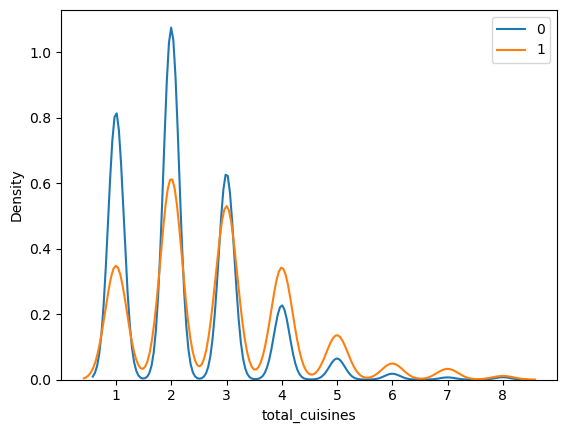

In [86]:
# Plots two overlapping distribution curves for the 'total_cuisines' feature
# One curve represents restaurants with target = 0 (low-rated), and the other with target = 1 (high-rated)
# The legend helps distinguish between the two groups, showing how cuisine variety relates to restaurant rating
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'],hist=False,label=1)
plt.legend()

It is easy to see that there is a high difference in overlap, meaning that the feature is biased and not usable for target prediction.

We will check the same for the other features.

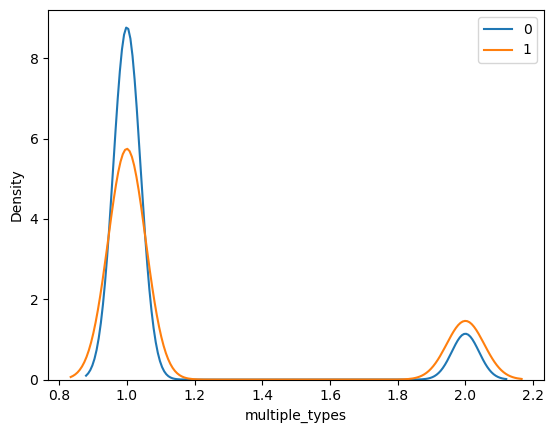

In [87]:
# Plots distribution curves comparing 'multiple_types' between low-rated (target = 0) and high-rated (target = 1) restaurants
# Helps visualize whether restaurants offering more types tend to receive higher ratings
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'],hist=False,label=1)
plt.legend()

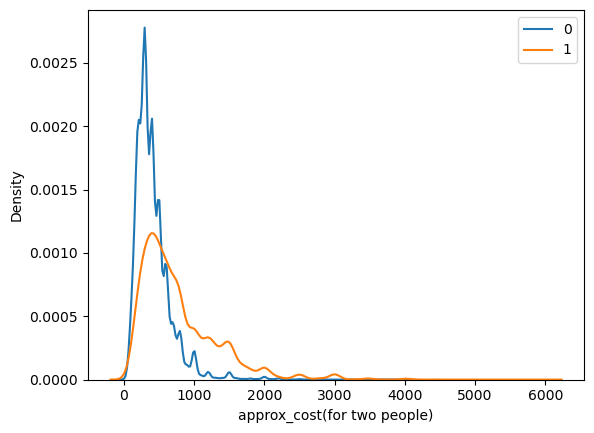

In [88]:
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'],hist=False,label=1)
plt.legend()

partial overlap

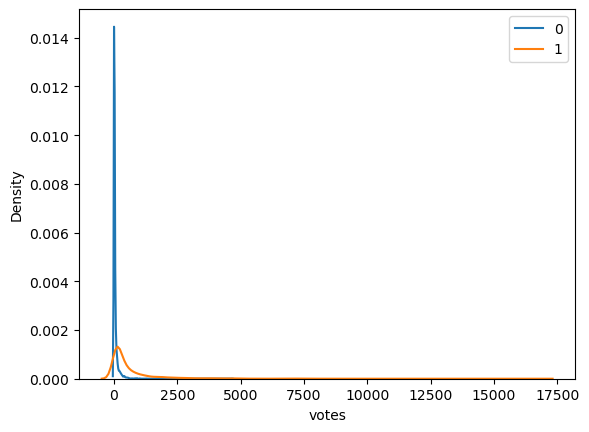

In [89]:
sns.distplot(dataframe[dataframe['target']==0]['votes'],hist=False,label=0)
sns.distplot(dataframe[dataframe['target']==1]['votes'],hist=False,label=1)
plt.legend()

## Encoding Features

but before that we'll remove all the features that doesn't make sense to be vaulable to predict the target

In [90]:
# Displays all the column names again to review which features are present
# This helps decide which columns are irrelevant or not useful for predicting the target variable before encoding features
dataframe.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [91]:
# Creates a list named imp_features containing the selected columns that are considered important for prediction
# These include features like online ordering, booking, votes, location, restaurant type, cost, listing info, and the target variable
imp_features = ['online_order', 'book_table', 'votes',
       'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 'target']

In [92]:
# Creates a new DataFrame called data that contains only the selected important features from the main DataFrame
# This subset will be used for encoding, model training, or further analysis
data = dataframe[imp_features]

In [93]:
data.shape

(51717, 9)

In [94]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target'],
      dtype='object')

In [95]:
# Creates a list cat_features containing all columns with data type 'object' (i.e., categorical features)
# Then displays those categorical columns from the DataFrame for inspection before encoding
cat_features = [col for col in data.columns if data[col].dtype=='O']
# 'O' is an allias of 'object'
data[cat_features]

,online_order,book_table,location,rest_type,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,Casual Dining,Buffet,Banashankari
1,Yes,No,Banashankari,Casual Dining,Buffet,Banashankari
2,Yes,No,Banashankari,"Cafe, Casual Dining",Buffet,Banashankari
3,No,No,Banashankari,Quick Bites,Buffet,Banashankari
4,No,No,Basavanagudi,Casual Dining,Buffet,Banashankari
...,...,...,...,...,...,...
51712,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51713,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51714,No,No,Whitefield,Bar,Pubs and bars,Whitefield
51715,No,Yes,"ITPL Main Road, Whitefield",Bar,Pubs and bars,Whitefield


In [96]:
# Creates a list num_features containing all columns that are not of type 'object' (i.e., numeric features)
# Then displays these numerical columns from the DataFrame to review the quantitative data before modeling
num_features = [col for col in data.columns if data[col].dtype!='O']
data[num_features]

,votes,approx_cost(for two people),target
0,775,800.0,1
1,787,800.0,1
2,918,800.0,1
3,88,300.0,0
4,166,600.0,1
...,...,...,...
51712,27,1500.0,0
51713,0,600.0,0
51714,0,2000.0,0
51715,236,2500.0,1


In [97]:
data['online_order'].nunique()

2

In [98]:
# Loops through each categorical feature and prints how many unique values it contains
# This helps understand the variety or cardinality of each categorical column before encoding them into numeric form
for feature in cat_features:
    print('{} has total {} unique features'.format(feature , data[feature].nunique() ))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 93 unique features
rest_type has total 93 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [99]:
data['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

How to find the number of items for each variable type for a particular feature 

In [100]:
# Displays the top 5 most frequent values in the 'rest_type' column along with their counts
# Useful for understanding which restaurant types are most common in the dataset
data['rest_type'].value_counts()[0:5]

rest_type
Quick Bites       19132
Casual Dining     10330
Cafe               3732
Delivery           2604
Dessert Parlor     2263
Name: count, dtype: int64

In [101]:
# Calculates the percentage of the top 5 most common restaurant types relative to the total number of records
# Helps visualize how dominant these types are in the overall dataset
data['rest_type'].value_counts()[0:5]/len(data)*100

rest_type
Quick Bites       36.993638
Casual Dining     19.974090
Cafe               7.216196
Delivery           5.035095
Dessert Parlor     4.375737
Name: count, dtype: float64

In [102]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100

In [103]:
freq_cat.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor'], dtype='object', name='rest_type')

In [104]:
# Checks whether each value in the 'rest_type' column exists in the index of freq_cat
# Returns a boolean Series (True/False) indicating which restaurant types are included in freq_cat
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51717, dtype: bool

In [105]:
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...
51641,No,No,4,Brookefield,Quick Bites,NaN,Dine-out,Whitefield,0
51642,No,No,0,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51643,No,No,0,Brookefield,Quick Bites,300.0,Dine-out,Whitefield,0
51644,No,No,0,Brookefield,Quick Bites,400.0,Dine-out,Whitefield,0


In [106]:
# Replaces rare restaurant types with the label 'other' while keeping frequent ones unchanged
# This reduces the number of unique categories, simplifying the data and avoiding sparse encoding during modeling
data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51712            other
51713            other
51714            other
51715            other
51716            other
Name: rest_type, Length: 51717, dtype: object

In [107]:
# Updates the 'rest_type' column so that any category not found in freq_cat is replaced with 'other'
# This step finalizes the grouping of rare restaurant types into a single category to simplify the feature for modeling
data['rest_type'] = data['rest_type'].apply(lambda x: 'other' if x not in freq_cat.index else x)

In [108]:
data['listed_in(city)'].value_counts()/len(data)*100

listed_in(city)
BTM                      6.340275
Koramangala 7th Block    5.680917
Koramangala 5th Block    5.483690
Koramangala 4th Block    5.373475
Koramangala 6th Block    5.071833
Jayanagar                4.584566
JP Nagar                 4.052826
Indiranagar              3.596496
Church Street            3.532688
MG Road                  3.501750
Brigade Road             3.420539
Lavelle Road             3.372199
HSR                      3.366398
Marathahalli             3.207843
Residency Road           3.132432
Whitefield               3.132432
Bannerghatta Road        3.126631
Brookefield              2.935205
Old Airport Road         2.755380
Kammanahalli             2.569755
Kalyan Nagar             2.531083
Basavanagudi             2.447938
Sarjapur Road            2.438270
Electronic City          2.376395
Bellandur                2.372527
Frazer Town              2.291316
Malleshwaram             2.119226
Rajajinagar              2.086355
Banashankari             1.66869

In [109]:
data['location'].value_counts()/len(data)*100

location
BTM                      9.907767
HSR                      4.878473
Koramangala 5th Block    4.841735
JP Nagar                 4.321596
Whitefield               4.145639
                           ...   
Yelahanka                0.011602
West Bangalore           0.011602
Jakkur                   0.005801
Rajarajeshwari Nagar     0.003867
Peenya                   0.001934
Name: count, Length: 93, dtype: float64

as we can see , the top 5 or even top 10 are not enough (70-90% of the unique variables) which means we cannot use the 'top 5' mehotd

In [110]:
# Converts the 'online_order' column into dummy variables (0/1) using one-hot encoding
# drop_first=True removes one column to avoid redundancy (dummy variable trap)
# .astype(int) ensures the resulting values are integers (0 and 1) instead of booleans
pd.get_dummies(data['online_order'], prefix='online_order', drop_first=True).astype(int)

# data['online_order']

,online_order_Yes
0,1
1,1
2,1
3,0
4,0
...,...
51712,0
51713,0
51714,0
51715,0


In [111]:
# Loops through selected categorical columns and performs one-hot encoding for each
# Creates dummy variables for all categories (excluding the first to prevent redundancy)
# Concatenates the new encoded columns back into the main DataFrame, expanding it with numerical representations of categorical data
for col in ['online_order','book_table','rest_type','listed_in(type)']:
    col_encoded = pd.get_dummies(data[col],prefix=col,drop_first=True).astype(int)
    data = pd.concat([data,col_encoded],axis=1)

In [112]:
data.head()

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,1,...,0,0,0,1,0,0,0,0,0,0
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,0,...,0,0,1,0,0,0,0,0,0,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Groups the data by restaurant location and calculates the average of the 'target' column for each location
# This shows which areas tend to have higher-rated restaurants on average
data.groupby(['location'])['target'].mean()

location
BTM                  0.240632
Banashankari         0.390728
Banaswadi            0.180723
Bannerghatta Road    0.220859
Basavanagudi         0.429825
                       ...   
West Bangalore       0.000000
Whitefield           0.293377
Wilson Garden        0.207317
Yelahanka            0.333333
Yeshwantpur          0.210084
Name: target, Length: 93, dtype: float64

In [114]:
# Creates a dictionary where each key is a restaurant location and each value is the average target (rating level) for that location
# Useful for encoding or analyzing location-based rating trends later in the workflow
dict_mean_location = data.groupby(['location'])['target'].mean().to_dict()
# data.groupby(['location'])['target'].mean().to_dict()

In [115]:
# Replaces each location in the 'location' column with its corresponding average target value from dict_mean_location
# This converts the categorical 'location' feature into a numeric representation based on how well restaurants perform in that area
data['location'] =data['location'].map(dict_mean_location)

In [116]:
data['location']

0        0.390728
1        0.390728
2        0.390728
3        0.390728
4        0.429825
           ...   
51712    0.293377
51713    0.293377
51714    0.293377
51715    0.230088
51716    0.230088
Name: location, Length: 51717, dtype: float64

In [117]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()
dict_mean_city

{'BTM': 0.3854833790789875,
 'Banashankari': 0.3962920046349942,
 'Bannerghatta Road': 0.25479282622139765,
 'Basavanagudi': 0.43364928909952605,
 'Bellandur': 0.31947840260798693,
 'Brigade Road': 0.5019785189372526,
 'Brookefield': 0.2621870882740448,
 'Church Street': 0.49808429118773945,
 'Electronic City': 0.1724979658258747,
 'Frazer Town': 0.4160337552742616,
 'HSR': 0.35611717403790927,
 'Indiranagar': 0.4650537634408602,
 'JP Nagar': 0.3268129770992366,
 'Jayanagar': 0.39561366512020246,
 'Kalyan Nagar': 0.3254392666157372,
 'Kammanahalli': 0.33559066967644846,
 'Koramangala 4th Block': 0.43468873695573945,
 'Koramangala 5th Block': 0.4263046544428773,
 'Koramangala 6th Block': 0.43804803659931374,
 'Koramangala 7th Block': 0.4329475833900613,
 'Lavelle Road': 0.474197247706422,
 'MG Road': 0.507454445057979,
 'Malleshwaram': 0.4306569343065693,
 'Marathahalli': 0.26341169379144064,
 'New BEL Road': 0.3081081081081081,
 'Old Airport Road': 0.4435087719298246,
 'Rajajinagar': 0

In [118]:
data['listed_in(city)'] =data['listed_in(city)'].map(dict_mean_city)

In [119]:
data['listed_in(city)']

0        0.396292
1        0.396292
2        0.396292
3        0.396292
4        0.396292
           ...   
51712    0.298148
51713    0.298148
51714    0.298148
51715    0.298148
51716    0.298148
Name: listed_in(city), Length: 51717, dtype: float64

In [120]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

Now we've completed the encoding for the selected categorical features

The next step will be to drop the original text-based columns since their encoded numeric versions are already included in the dataset

In [121]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.390728,Casual Dining,800.0,Buffet,0.396292,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.390728,Casual Dining,800.0,Buffet,0.396292,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,0.390728,other,800.0,Buffet,0.396292,1,1,...,0,0,0,1,0,0,0,0,0,0


In [122]:
# Removes the original categorical columns that were already one-hot encoded
# This keeps the dataset clean and avoids duplicate information before further analysis or modeling
data.drop(['online_order', 'book_table','rest_type','listed_in(type)'], axis=1,inplace=True)

In [123]:
data.head(2)

,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,rest_type_Casual Dining,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.390728,800.0,0.396292,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,787,0.390728,800.0,0.396292,1,1,0,1,0,0,0,0,0,0,0,0,0,0


## Outliers

In [124]:
data['votes'].max()

16832

In [125]:
data['votes'].min()

0

data visualizations are great tools to look for outliers as they help identify outliers in the dataset

In [126]:
# Imports the stats module from the SciPy library
# This module provides statistical functions and tests commonly used for data analysis, such as z-scores, correlations, and hypothesis testing
from scipy import stats

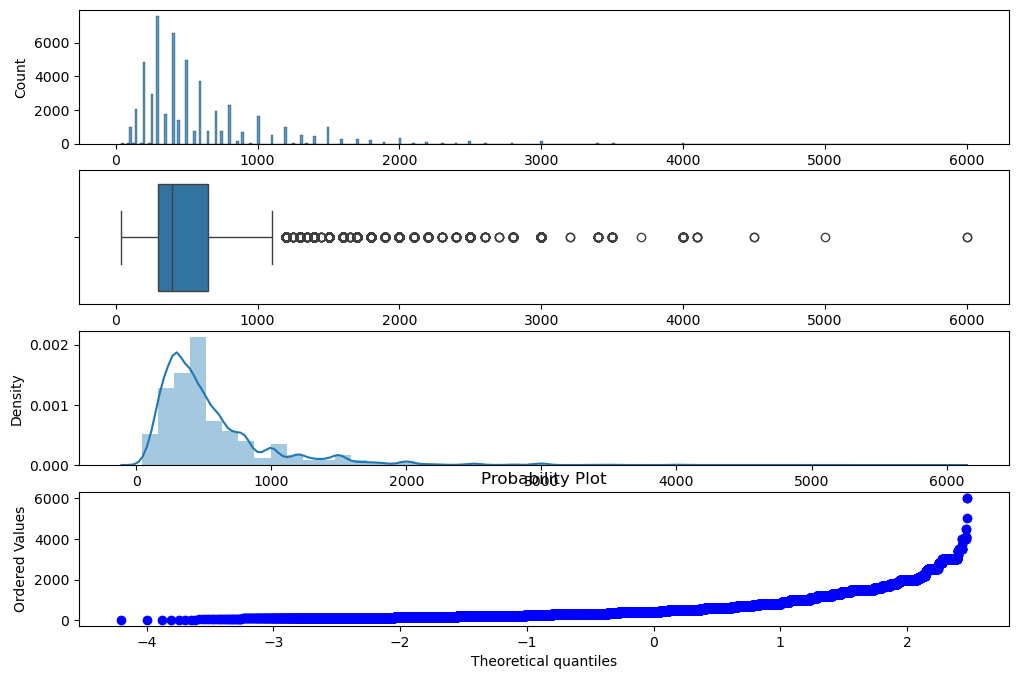

In [127]:
# Creates a 4-panel visualization (stacked vertically) to analyze the 'approx_cost(for two people)' feature
# 1. Histogram shows the distribution of cost values
# 2. Boxplot highlights the median, quartiles, and potential outliers
# 3. Distribution plot combines histogram and density curve for a smoother view
# 4. Q-Q plot (probability plot) checks whether the data follows a normal distribution

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
# sns.boxplot(data['approx_cost(for two people)'])

sns.boxplot(x=data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'],plot =plt)

plt.show()

In [128]:
# Applies a log transformation (log1p adds 1 before taking the log) to the 'approx_cost(for two people)' column
# This helps reduce skewness and normalize the distribution, making it more suitable for modeling and statistical analysis
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

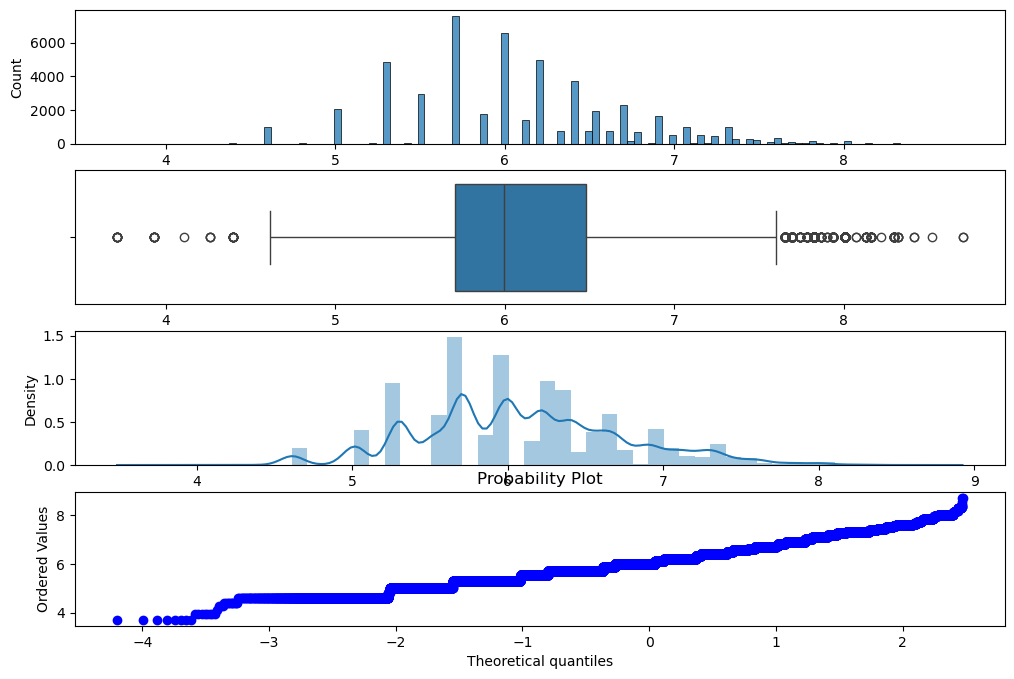

In [129]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
# sns.boxplot(data['approx_cost(for two people)'])

sns.boxplot(x=data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'],plot =plt)

plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

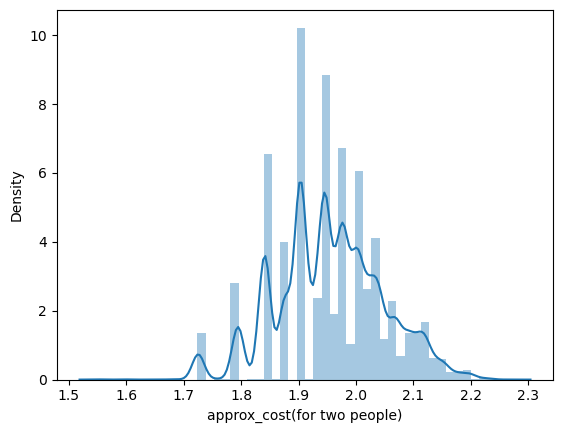

In [130]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

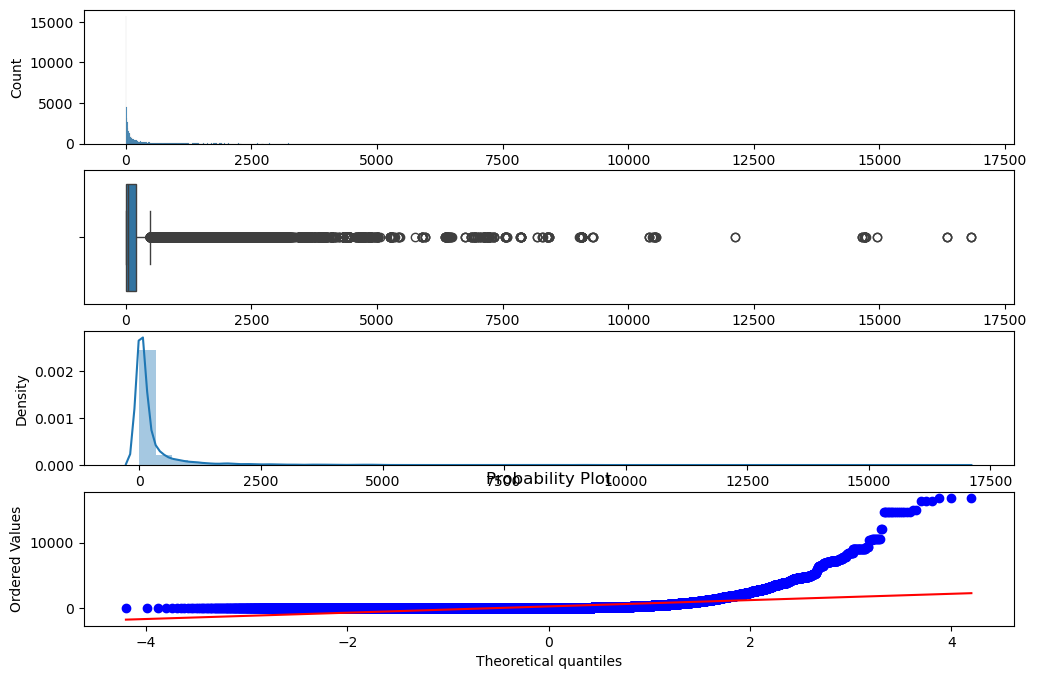

In [131]:
# Do the same for 'votes' feature


plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
# sns.boxplot(data['approx_cost(for two people)'])

sns.boxplot(x=data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'],plot =plt)

plt.show()

In [132]:
data['votes'] = np.log1p(data['votes'])

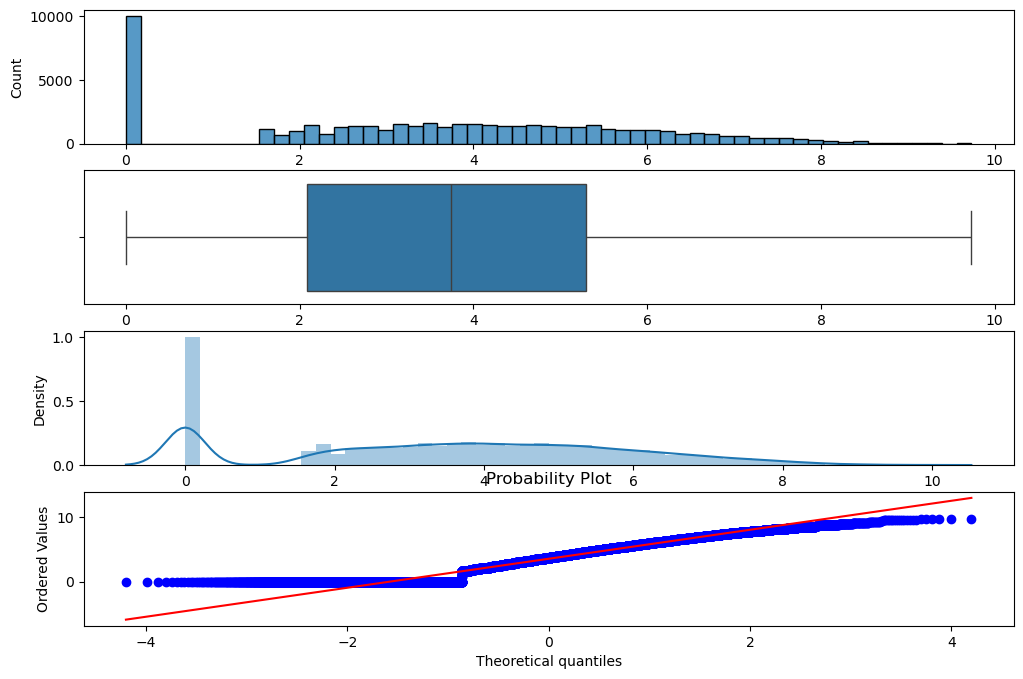

In [133]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
# sns.boxplot(data['approx_cost(for two people)'])

sns.boxplot(x=data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'],plot =plt)

plt.show()

## Building a Machine Learning Model

Machine learning models work with data of the type
numbers or vectors.
That is, we need our vectors to be numbered (as we have done so far).

In [134]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                        int64
book_table_Yes                          int64
rest_type_Casual Dining                 int64
rest_type_Delivery                      int64
rest_type_Dessert Parlor                int64
rest_type_Quick Bites                   int64
rest_type_other                         int64
listed_in(type)_Cafes                   int64
listed_in(type)_Delivery                int64
listed_in(type)_Desserts                int64
listed_in(type)_Dine-out                int64
listed_in(type)_Drinks & nightlife      int64
listed_in(type)_Pubs and bars           int64
dtype: object

In [140]:
# We will split the data into dependent (target column) and independent variables.
X = data.drop('target', axis=1)
y= data['target']

steps of building a ML model
* split into train\ test  data set
* init ML algo
* train ML using training set
* prediction(testing)
* ML model (evaluation) 

In [143]:
# Imports the train_test_split function from scikit-learn
# This function is used to split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

In [ ]:
# Splits the data into training and testing sets
# 70% of the data is used for training and 30% for testing (test_size=0.30)
# random_state=42 ensures the split is reproducible each time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Imports the RandomForestClassifier from scikit-learn’s ensemble module
# This model builds multiple decision trees and combines their results to improve accuracy and reduce overfitting
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creates an instance of the RandomForestClassifier with default parameters
# This object (rf_model) will later be trained on the dataset to predict the target variable
rf_model = RandomForestClassifier()

In [150]:
# Trains the Random Forest model using the training data (features X_train and target y_train)
# The model learns patterns and relationships between the input variables and the target labels
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [153]:
# Uses the trained Random Forest model to predict target values for the test set (X_test)
# The output is an array of predicted classes (e.g., 0 or 1) for each record in the test data
predictions = rf_model.predict(X_test)

In [154]:
predictions

array([0, 0, 1, ..., 0, 1, 1])

In [156]:
# Imports two evaluation metrics from scikit-learn:
# - accuracy_score: measures the percentage of correct predictions made by the model
# - confusion_matrix: shows how many predictions were correct or incorrect for each class
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Calculates the model’s accuracy by comparing predicted values with the actual test labels (y_test)
# Returns the proportion of correct predictions as a decimal between 0 and 1
accuracy_score(predictions, y_test)

0.9358081979891725

In [ ]:
# Generates a confusion matrix comparing predicted labels to the actual labels (y_test)
# It shows the counts of true positives, true negatives, false positives, and false negatives — useful for evaluating model performance
confusion_matrix(predictions, y_test)

array([[8900,  587],
       [ 409, 5620]])

for the following output:

array([[8900,  587],
       [ 409, 5620]])

       

The confusion matrix output can be interpreted as follows:
- Top-left (8900): True Negatives — correctly predicted low-rated restaurants
- Top-right (587): False Positives — predicted high-rated but actually low-rated
- Bottom-left (409): False Negatives — predicted low-rated but actually high-rated
- Bottom-right (5620): True Positives — correctly predicted high-rated restaurants
Overall, most predictions are correct, showing the model performs quite well